In [339]:
##Elastic
##chas,nox
##RFE
##age,tax,black,indus
##Corrplot
##tax,rad
##total
##chas,nox,age,tax,black,rad
##Influential
## 368,371,372 -Residual high
## 365,367,369,370
##412
##374,380-high leverage
##366

# Import all the necessary packages

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import KFold 
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.feature_selection import RFE, f_regression

# Read Csv and Description

    1.File reading
    2.Missing  Values
    3.Data summary

In [268]:
##Read file
df=pd.read_csv("D:/DS Training Videos/ML algo script/1.Linear Regression/HousingCS.csv",sep=',')
##shape
print("Dataset shape:",df.shape)
print("-------------------")
print("Dataset summary:")
##summary
print(df.describe())
print("-------------------")
##Missing values
print("Missing values column wise:")
print(df.isnull().sum())

Dataset shape: (506, 14)
-------------------
Dataset summary:
             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio       black  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408

# Run this cell only once as these are the influential points found using cooks distance at end of code 

In [269]:
#####Uncomment and run only once
##InDependent variables
#df=df.drop([364,365,367,368,369,370,371,372,374,380,388,389,390,391,412])

# Feature selection

In [339]:
#x=df.iloc[:,:-1]
#0.815,3.95
#x=df.loc[:,['crim','zn','indus','chas','nox','rm','age','dis','ptratio','black','lstat']]
#0.811,4.04
#x=df.loc[:,['crim','zn','chas','nox','rm','dis','age','ptratio','black','lstat']]
#0.808,4.11
#x=df.loc[:,['crim','zn','chas','nox','rm','dis','ptratio','black','lstat']]
#0.807 4.10
#x=df.loc[:,['crim','zn','indus','rm','dis','ptratio','lstat']]
###x=df.loc[:,['crim','chas','nox','rm','dis','ptratio','black','lstat']]
#0.814,4.17
x=df.loc[:,['crim','chas','nox','rm','dis','ptratio','black','lstat']]
##Dependent variables
y=np.log(df.iloc[:,-1])
#0.828,0.17

# Scatter plot

Comparison of All dependent variables vs Independent variable

0 crim
1 zn
2 indus
3 chas
4 nox
5 rm
6 age
7 dis
8 rad
9 tax
10 ptratio
11 black
12 lstat
13 medv


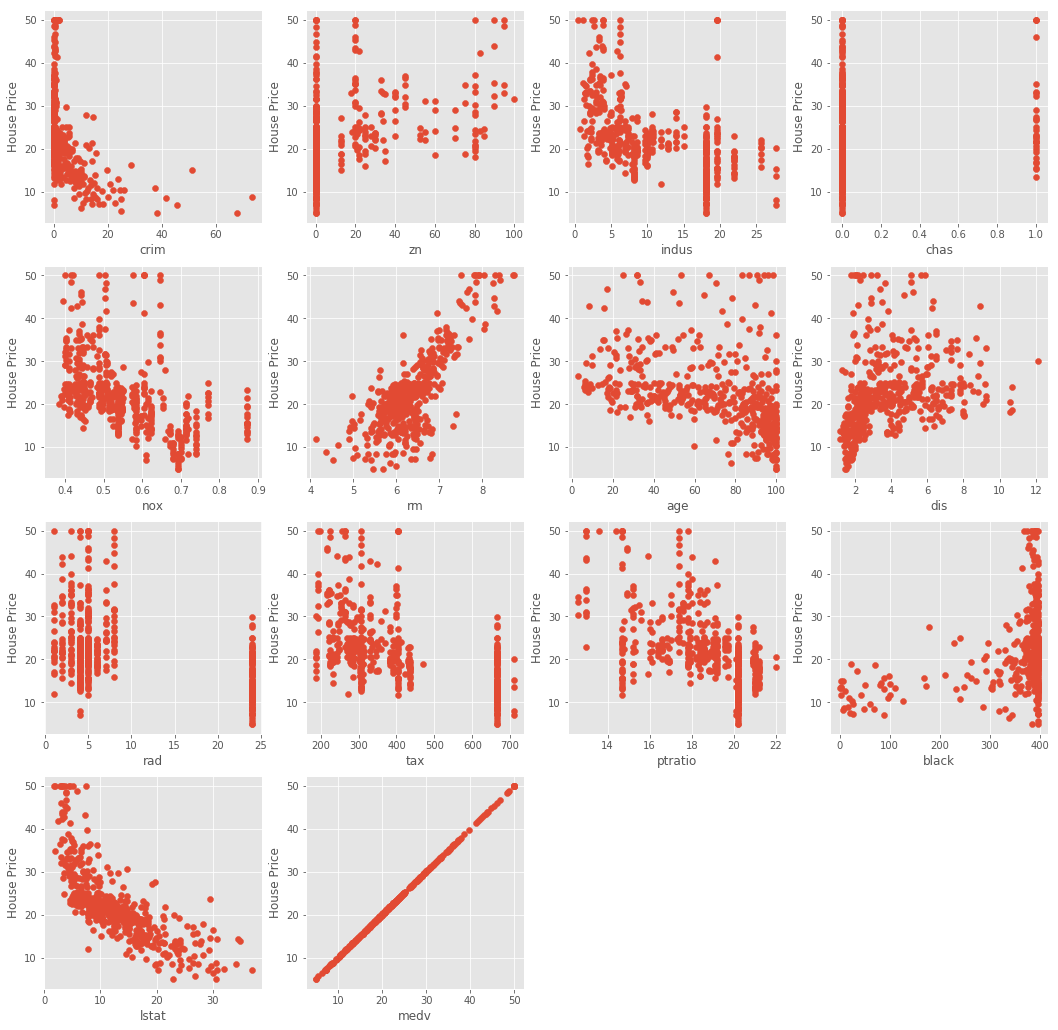

In [340]:
# Generate scatter plot of independent vs Dependent variable 
plt.style.use('ggplot') 
fig = plt.figure(figsize = (18, 18)) 
  
for index, feature_name in enumerate(df.columns): 
    print(index,feature_name)
    ax = fig.add_subplot(4, 4, index + 1) 
    ax.scatter(df.iloc[:, index],np.exp(y)) 
    ax.set_ylabel('House Price', size = 12) 
    ax.set_xlabel(feature_name, size = 12) 
plt.show() 

# Correlation Matrix

Categorical variables are removed and only Numeric variables are compared for correlation

In [341]:
##Correlation heatmap
hcorr =df.corr()
hcorr=hcorr[['crim','zn','indus','nox','rm','age','dis','tax','ptratio','black','lstat']]

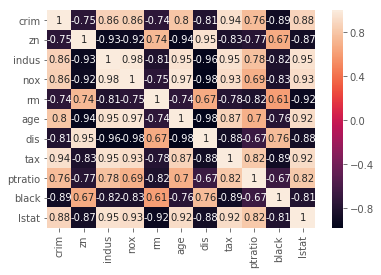

In [342]:
##Heatmap correaltion
sns.heatmap(hcorr.corr(), annot = True )

# Histogram

All Dependent variables are given univariate analysis

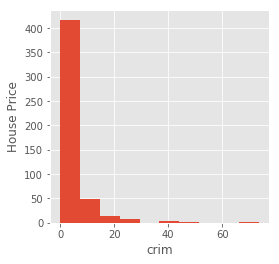

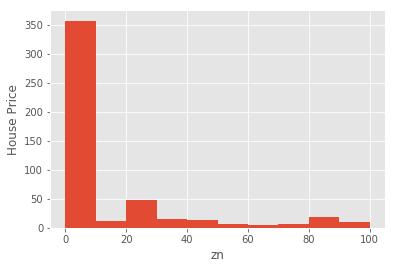

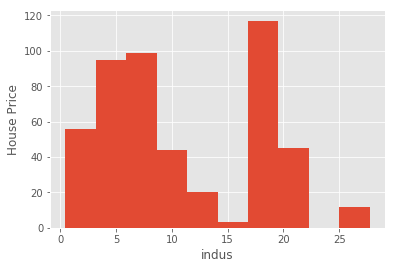

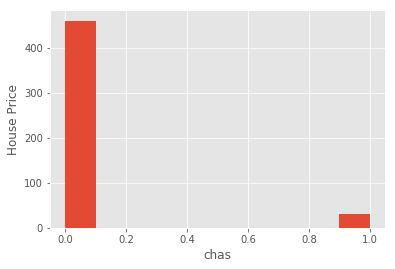

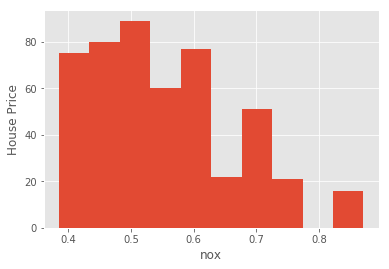

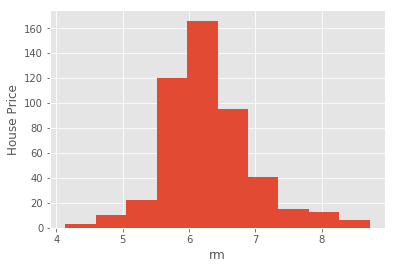

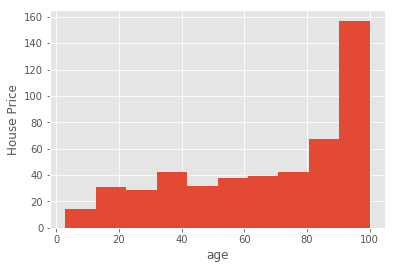

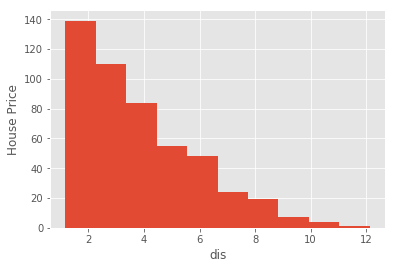

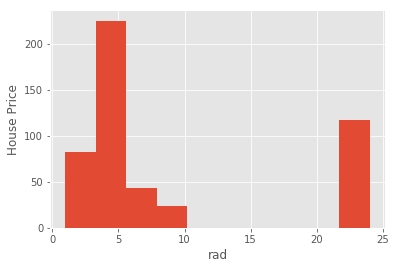

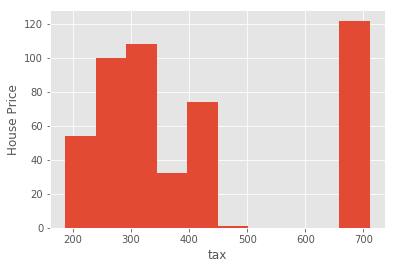

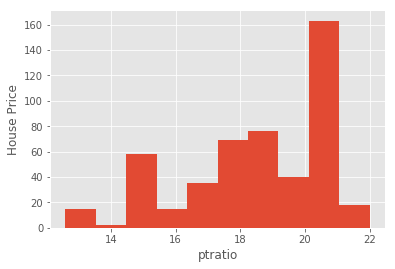

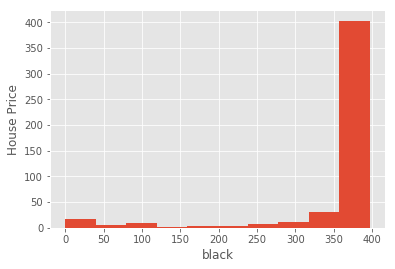

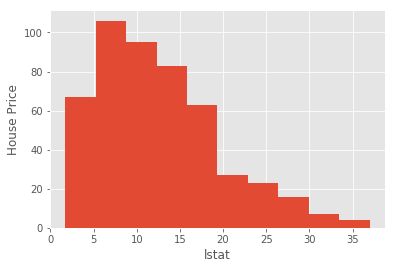

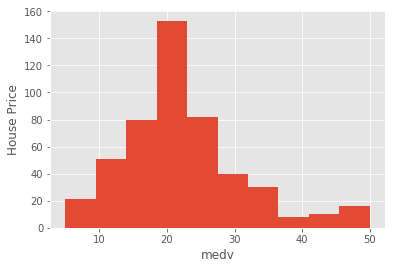

In [343]:
##histogram
plt.style.use('ggplot')  
fig = plt.figure(figsize = (18, 18))
for index, feature_name in enumerate(df.columns): 
    ax = fig.add_subplot(4, 4, index + 1) 
    plt.hist(df[feature_name])
    plt.ylabel('House Price', size = 12) 
    plt.xlabel(feature_name, size = 12) 
    plt.show() 

# Boxplot

All Dependent variables are plotted

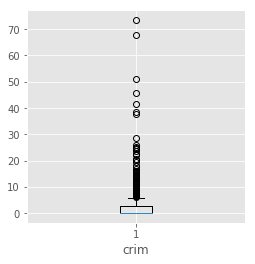

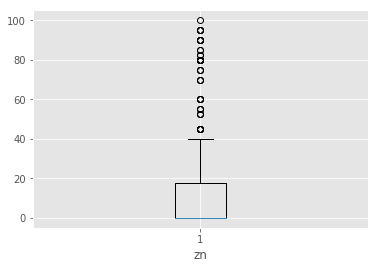

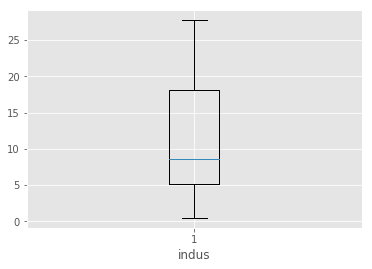

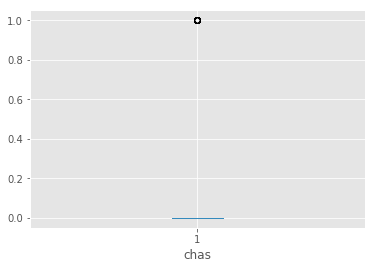

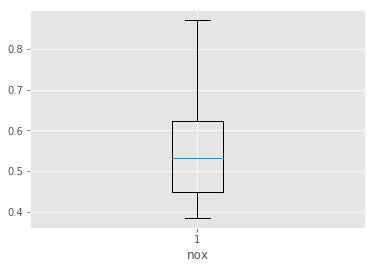

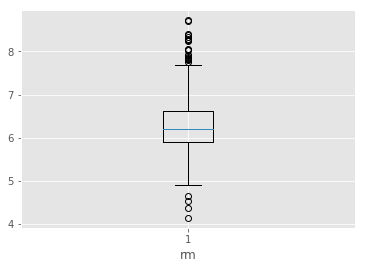

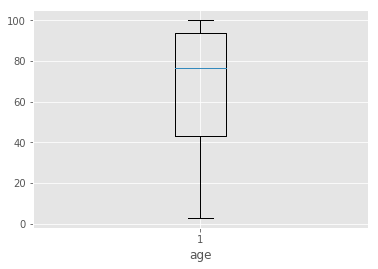

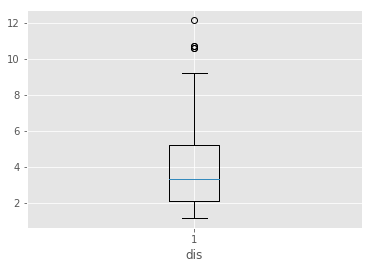

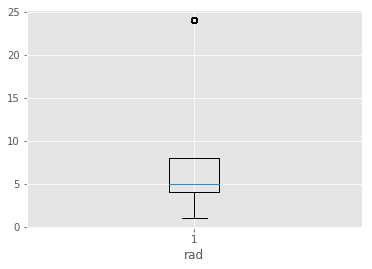

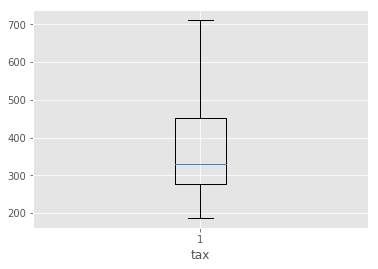

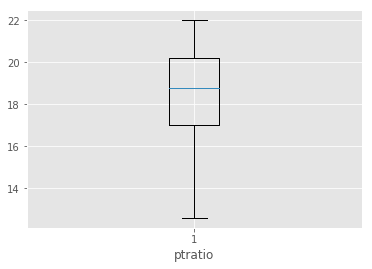

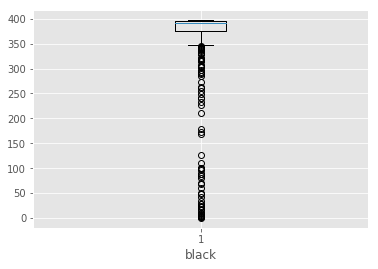

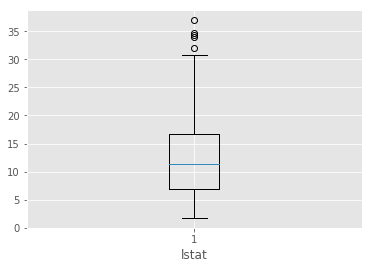

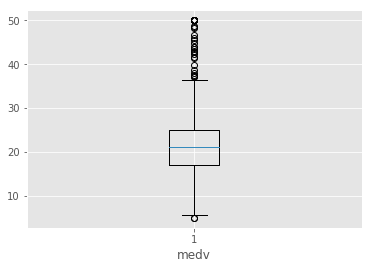

In [344]:
#Boxplot
plt.style.use('ggplot')  
fig = plt.figure(figsize = (18, 18))
for index, feature_name in enumerate(df.columns): 
    ax = fig.add_subplot(4, 4, index + 1) 
    plt.boxplot(df[feature_name])
    plt.xlabel(feature_name, size = 12) 
    plt.show() 

# Train_Test_Split

Partition of train and test data in the ratio of 7:3

In [345]:
##Split the dataset
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=10)
print ("Training shape:",x_train.shape)
print ("Testing shape:",x_test.shape)
print("Training shape:",y_train.shape)
print("Testing shape:",y_test.shape)

Training shape: (343, 8)
Testing shape: (148, 8)
Training shape: (343,)
Testing shape: (148,)


# Train and test file storage

Storing the files as same results are used for R implementation

In [346]:
train_df=pd.concat([x_train,y_train],axis=1)
train_df=pd.DataFrame(train_df)
train_df.to_csv('train.csv') 
test_df=pd.concat([x_test,y_test],axis=1)
test_df=pd.DataFrame(test_df)
test_df.to_csv('test.csv') 

# Model Fit

In [347]:
#Fit the model
linear_reg = LinearRegression()
model = linear_reg.fit(x_train,y_train) 

# Slope and Intercept

In [348]:
# slope
print("Slope:")
print(model.coef_)
# slope
print("Intercept:")
print(model.intercept_)

Slope:
[-9.43081927e-03  1.00792499e-01 -5.87606246e-01  1.65763568e-01
 -2.78689895e-02 -3.68322163e-02  3.56790275e-04 -2.46973789e-02]
Intercept:
3.3078120356011076


# Model prediction

In [349]:
##Predict for test set
pred = model.predict(x_test)
print("Predicted medv for test:")
pred

Predicted medv for test:


array([3.43624583, 3.17250075, 2.7198834 , 2.73712974, 3.00120712,
       2.8857903 , 2.77506306, 2.70830543, 2.86302372, 2.77408331,
       2.68414755, 3.21087769, 3.40173757, 3.36929838, 2.07831133,
       3.03851696, 3.35453882, 2.42702255, 2.8525781 , 3.30595472,
       2.73958798, 3.17843391, 2.97804862, 3.76427728, 2.89991714,
       3.75337669, 3.55818518, 3.23656516, 3.47075624, 3.18841533,
       2.90214822, 3.44031417, 2.9790934 , 2.82202742, 3.17638326,
       3.0064512 , 3.55736112, 3.18384589, 3.2585274 , 3.22144103,
       3.12644192, 2.48443265, 2.80862457, 3.63367671, 3.49162725,
       2.654336  , 3.00456815, 3.18549118, 3.36527839, 3.09903739,
       3.07458796, 3.32413486, 2.97320241, 3.3034881 , 3.17822522,
       2.96460703, 3.01189697, 3.12017691, 3.08186653, 3.45435172,
       3.00605973, 3.24862545, 3.12467175, 2.92233308, 3.23812905,
       3.0503555 , 2.64199758, 3.67441888, 3.52267332, 2.88110846,
       3.2748051 , 3.1149869 , 2.8408741 , 3.25291843, 3.01970

# Model Evaluation

RMSE , MAE are calculated

In [350]:
##Model evaluation
from sklearn import metrics
##RMSE ,MAE
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,pred)))
print("MAE:",metrics.mean_absolute_error(y_test,pred))

RMSE: 0.1415010857046474
MAE: 0.10778289985695166


R^2 ,Adjusted R^2 are calculated

In [351]:
##R2 and Adjusted R2
r_squared=linear_reg.score(x_test,y_test)
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1)
print("Testing score")
print(r_squared,adjusted_r_squared)
r_squared=linear_reg.score(x_train,y_train)
print("Training score")
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1)
print(r_squared,adjusted_r_squared)

Testing score
0.8410400500561549 0.8372326261054042
Training score
0.8224969975498038 0.818245428628841


In [352]:
from sklearn.metrics import r2_score
trainPred = linear_reg.predict(x_train)
print ("Train Score:", r2_score(y_train, trainPred))
print ("Test Score:", r2_score(y_test, pred))

Train Score: 0.8224969975498038
Test Score: 0.8410400500561549


# K-Fold Cross Validation

R^2 ,MAE are calculated

In [353]:
from sklearn.model_selection import KFold # import KFold
from sklearn.cross_validation import cross_val_score
kf = KFold(10, True,10)

scores = cross_val_score(model, x_train, y_train,scoring=('r2'), cv=5)
err_scores = cross_val_score(model, x_train, y_train,scoring=('neg_mean_squared_error'), cv=10)
print("R2 score:")
print (scores)
print("MAE score:")
print (err_scores)
print("R2 std deviation:",scores.std())
print("R2  mean :",scores.mean())
print("MAE std deviation:",err_scores.std())
print("MAE mean:",err_scores.mean())

R2 score:
[0.79866371 0.82480906 0.83059994 0.83039548 0.65542398]
MAE score:
[-0.02380299 -0.02703002 -0.02529912 -0.07709239 -0.03352879 -0.04042966
 -0.02662845 -0.02275469 -0.03813058 -0.02497361]
R2 std deviation: 0.0673159022720892
R2  mean : 0.7879784334408239
MAE std deviation: 0.015511624628398004
MAE mean: -0.03396703011743561


# Ridge Regression

Finding best lambda value to minimise RMSE for ridge

In [354]:
cross_val_scores_ridge=[]
alpha=[]
print("RMSE scores:")
for i in range(1, 9): 
    ridgeModel = Ridge(alpha = i * 0.25) 
    ridgeModel.fit(x_train, y_train) 
    scores = cross_val_score(ridgeModel, x, y, cv = 10) 
   
    avg_cross_val_score = scores.mean()
    cross_val_scores_ridge.append(avg_cross_val_score) 
    alpha.append(i * 0.25) 
for i in range(0, len(alpha)): 
    print(str(alpha[i])+' : '+str(cross_val_scores_ridge[i]))

RMSE scores:
0.25 : 0.5721058800070355
0.5 : 0.5721339779880511
0.75 : 0.5718085522452656
1.0 : 0.5713041862973937
1.25 : 0.5707145450207809
1.5 : 0.5700912218613234
1.75 : 0.5694629674258221
2.0 : 0.5688457145372022


# Lasso Regression

Find best lambda value to minimse RMSE for lasso

In [355]:
cross_val_scores_lasso = [] 
  
# List to maintain the different values of Lambda 
Lambda = [] 
  
# Loop to compute the cross-validation scores 
for i in range(1, 9): 
    lassoModel = Lasso(alpha = i * 0.25, tol = 0.0925) 
    lassoModel.fit(x_train, y_train) 
    scores = cross_val_score(lassoModel, x, y, cv = 10) 
    avg_cross_val_score = scores.mean()*100
    cross_val_scores_lasso.append(avg_cross_val_score) 
    Lambda.append(i * 0.25) 
  
# Loop to print the different values of cross-validation scores 
for i in range(0, len(alpha)): 
    print(str(alpha[i])+' : '+str(cross_val_scores_lasso[i])) 

0.25 : 29.277481320373834
0.5 : 25.470779186071578
0.75 : 16.59346258022949
1.0 : 4.825928501050318
1.25 : -11.795442003366494
1.5 : -30.975797550835054
1.75 : -52.10078852750449
2.0 : -69.10290708717726


Applying best lambda on ridge
 lambda=0.25 seems to be best of all on ridge lasso and elastic

# Ridge Regression Model Fit

    Avoid multicolinearity and shrink coefficent
    Higher the alpha higher the reduction in rmse and better r^2
    Run only with all columns

In [356]:
# Ridge regression
#Avoid multicolinearity and shrink coefficent
##Higher the alpha higher the reduction in rmse and better r^2
##Run only with all columns
ridgeR = Ridge(alpha = 0.25) 
model=ridgeR.fit(x_train, y_train) 
y_pred = model.predict(x_test) 

scores = cross_val_score(model, x_train, y_train,scoring=('r2'), cv=10)
print("R2 score:",scores.mean())
# calculate mean square error 
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,pred)))
  
# get ridge coefficient and print them 
ridge_coefficient = pd.DataFrame() 
ridge_coefficient["Columns"]= x_train.columns 
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_) 
print(ridge_coefficient) 

R2 score: 0.7765072982243165
RMSE: 0.1415010857046474
   Columns  Coefficient Estimate
0     crim             -0.009497
1     chas              0.098419
2      nox             -0.503654
3       rm              0.165816
4      dis             -0.025306
5  ptratio             -0.036446
6    black              0.000368
7    lstat             -0.025092


# Coefficent Ridge bar plot

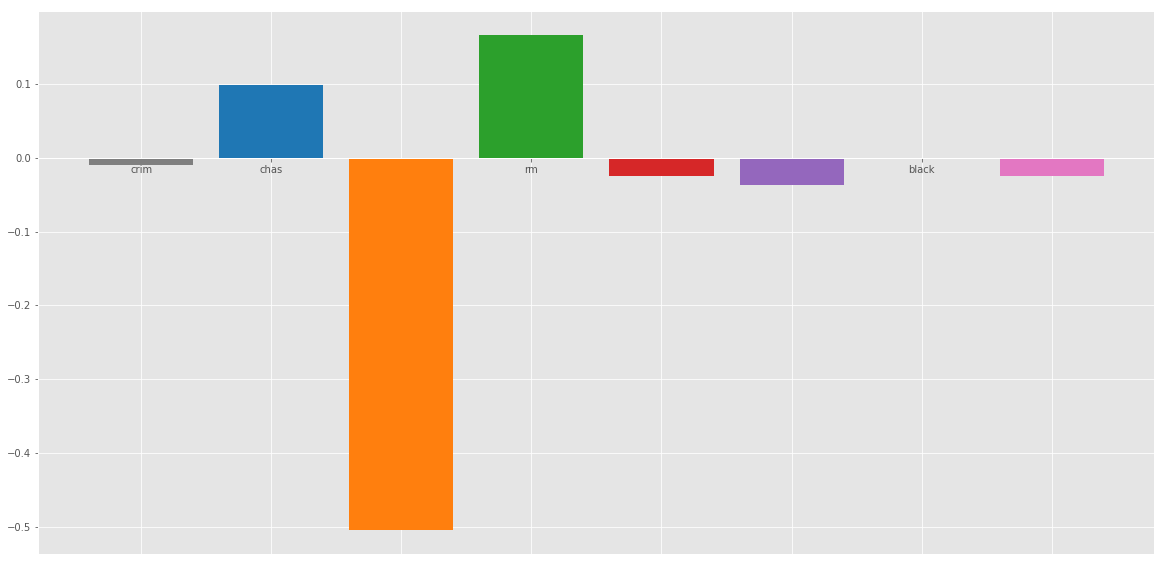

In [357]:
fig, ax = plt.subplots(figsize =(20, 10)) 
  
color =['tab:gray', 'tab:blue', 'tab:orange',  
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',  
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',  
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive'] 
  
ax.bar(ridge_coefficient["Columns"],  
ridge_coefficient['Coefficient Estimate'],  
color = color) 
  
ax.spines['bottom'].set_position('zero') 
  
plt.style.use('ggplot') 
plt.show() 

# Lasso Regression Model Fit

    Feature Selection
    Makes Coefficient to zero
    Wont consider Multicollinearity

In [358]:
# Train the model 
##Run only with all columns
lasso = Lasso(alpha = 0.25) 
model=lasso.fit(x_train, y_train) 
y_pred1 = lasso.predict(x_test) 
  
scores = cross_val_score(model, x_train, y_train,scoring=('r2'), cv=10)
print("R2 score:",scores.mean())
# Calculate Mean Squared Error 
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,pred)))

lasso_coeff = pd.DataFrame() 
lasso_coeff["Columns"] = x_train.columns 
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_) 
  
print(lasso_coeff) 

R2 score: 0.6535653266472695
RMSE: 0.1415010857046474
   Columns  Coefficient Estimate
0     crim             -0.007986
1     chas              0.000000
2      nox             -0.000000
3       rm              0.000000
4      dis             -0.000000
5  ptratio             -0.000000
6    black              0.000476
7    lstat             -0.035801


# Coefficent of Lasso Regression bar plot

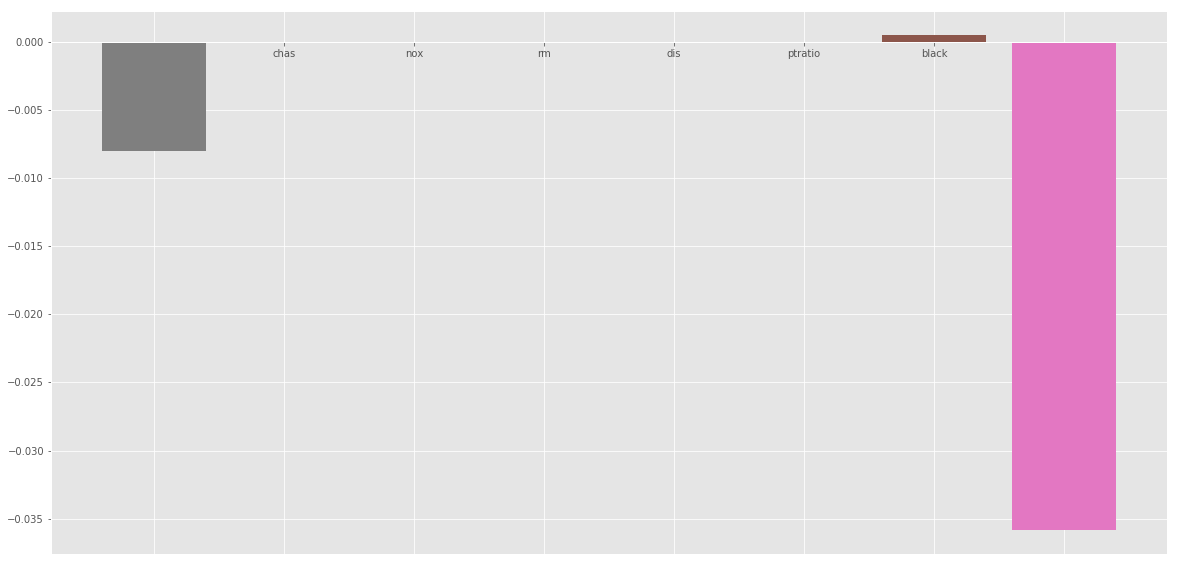

In [359]:
fig, ax = plt.subplots(figsize =(20, 10)) 
  
color =['tab:gray', 'tab:blue', 'tab:orange',  
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',  
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',  
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive'] 
  
ax.bar(lasso_coeff["Columns"],  
lasso_coeff['Coefficient Estimate'],  
color = color) 
  
ax.spines['bottom'].set_position('zero') 
  
plt.style.use('ggplot') 
plt.show() 

# Elastic Regression

Applying best lambda on elastic regression

In [360]:
##Elastic net 
##Run only with all columns
e_net = ElasticNet(alpha = 0.25) 
model=e_net.fit(x_train, y_train) 
  
# calculate the prediction and mean square error 
scores = cross_val_score(model, x_train, y_train,scoring=('r2'), cv=10)
print("R2 score:",scores.mean())
y_pred_elastic = model.predict(x_test) 
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,pred))) 
  
e_net_coeff = pd.DataFrame() 
e_net_coeff["Columns"] = x_train.columns 
e_net_coeff['Coefficient Estimate'] = pd.Series(e_net.coef_) 
e_net_coeff

R2 score: 0.6908577327256176
RMSE: 0.1415010857046474


,Columns,Coefficient Estimate
0,crim,-0.008770
1,chas,0.000000
2,nox,-0.000000
3,rm,0.000000
4,dis,-0.000000
5,ptratio,-0.018238
6,black,0.000387
7,lstat,-0.035945


# Recursive Feature Elimination

In [361]:
##RFE
from sklearn.feature_selection import RFE, f_regression
fselect = RFE(model, n_features_to_select=7, verbose=3)
features = fselect.fit(x_train,y_train)
#features = fselect.fit(x,y)
print("Num Features: %s" % (features.n_features_))

#ref.support_ returns an array with boolean values to indicate whether an attribute was selected using RFE 
print("Selected Features: %s" % (features.support_))
# ref.ranking_ returns an array with positive integer values to indicate the attribute ranking with
# a lower score indicating a higher ranking 
print("Feature Ranking: %s" % (features.ranking_))
#print (features.get_params)

Fitting estimator with 8 features.
Num Features: 7
Selected Features: [ True False  True  True  True  True  True  True]
Feature Ranking: [1 2 1 1 1 1 1 1]


In [362]:
x.columns 

Index(['crim', 'chas', 'nox', 'rm', 'dis', 'ptratio', 'black', 'lstat'], dtype='object')

# Import packages for Statsmodel

In [363]:
import statsmodels.formula.api as smf
import scipy.stats as scipystats
import statsmodels.api as sm
import statsmodels.stats.stattools as stools
import statsmodels.stats as stats 
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.graphics.regressionplots import *
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import copy
from sklearn.cross_validation import train_test_split
import math
import time
from scipy import stats
import statsmodels.stats.api as sms
import statsmodels.stats.stattools as stools
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

# OLS Fit Model

In [365]:
#'crim','zn','indus','chas','nox','rm','age','dis','ptratio','black','lstat'
#'crim','chas','nox','rm','dis','ptratio','black','lstat'
lm = smf.ols(formula = "np.log(medv)~crim+chas+nox+rm+dis+ptratio+black+lstat", data = df).fit()
y, X = dmatrices("np.log(medv)~crim+chas+nox+rm+dis+ptratio+black+lstat", data = df, return_type = "dataframe")

In [366]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           np.log(medv)   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     291.3
Date:                Fri, 12 Jun 2020   Prob (F-statistic):          3.22e-179
Time:                        12:29:31   Log-Likelihood:                 185.56
No. Observations:                 491   AIC:                            -353.1
Df Residuals:                     482   BIC:                            -315.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.2261      0.180     17.881      0.000       2.872       3.581
crim          -0.0096      0.001     -7.961      0.000      -0.012      -0.007
chas           0.0817      0.032      2.574      0.010       0.019       0.144
nox           -0.6115      0.114     -5.351      0.000      -0.836      -0.387
rm             0.1728      0.015     11.186      0.000       0.142       0.203
dis           -0.0312      0.006     -5.433      0.000      -0.043      -0.020
ptratio       -0.0364      0.004     -9.214      0.000      -0.044      -0.029
black          0.0005   9.73e-05      4.713      0.000       0.000       0.001
lstat         -0.0234      0.002    -12.797      0.000      -0.027      -0.020
==============================================================================
Omnibus:                       36.521   Durbin-Watson:                   1.091
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              137.514
Skew:                          -0.168   Prob(JB):                     1.38e-30
Kurtosis:                       5.571   Cond. No.                     9.46e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.46e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model Diagnostics

# Durbin Watson test and BP test

    Durbin watson-Check for Autocorrelation,pvalue<alpha we reject
    BP test- Check forHomoscadasticity, pvalue<alpha we reject

In [367]:
###Model validations

print ("Durbin-Watson test statistics is " + str(stools.durbin_watson(lm.resid)))

name = ['Lagrange multiplier statistic', 'p-value', 
        'f-value', 'f p-value']
test = sms.het_breuschpagan(lm.resid, lm.model.exog)
test
# Lagrange mul stat
# p value
# fvalue
# f p value 

Durbin-Watson test statistics is 1.0907495111162298


(80.93541540360728,
 3.168442749119539e-14,
 11.891684776599051,
 1.6000497310730156e-15)

# Variable Inflation Factor

Check for multicollinearity.If greater than 5 we reject it

In [368]:
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print (vif)
#crim+ zn+ indus+ chas+ nox+ rm+ age+ dis+rad+tax+ptratio+black+lstat
print(df.columns)

[570.6500979196427, 1.5340882733029166, 1.0456238136935687, 3.0624098585395276, 1.8399247891297708, 2.543660369220356, 1.2930068639985581, 1.3647322184833839, 2.848136079967896]
Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')


# Cooks distance

Used to find outliers based on high leverage or high residuals

<StemContainer object of 3 artists>

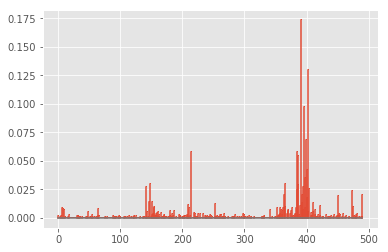

In [369]:
influence = lm.get_influence()
#c is the distance and p is p-value
(c, p) = influence.cooks_distance
#print(np.where(c>4/len(c)))
#c=(c[c>0.1])
plt.stem(np.arange(len(c)), c, markerfmt=",")

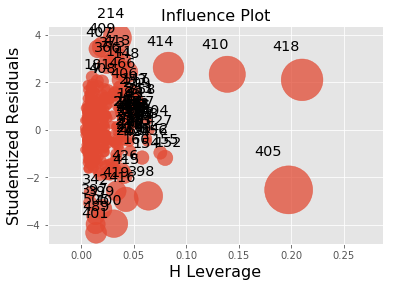

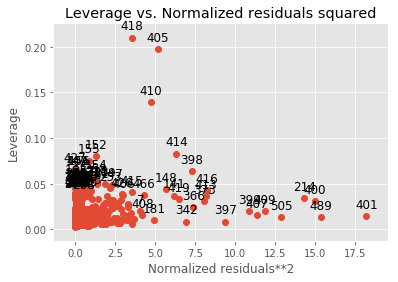

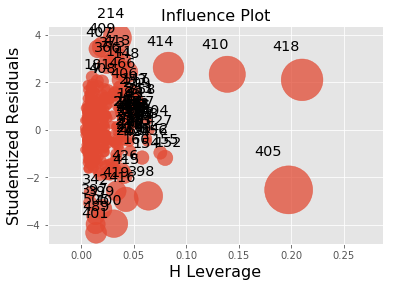

In [370]:
from statsmodels.graphics.regressionplots import *
plot_leverage_resid2(lm)
influence_plot(lm,criterion="cooks")

# Normality of residual

Text(0.5,0,'Normalized residuals')

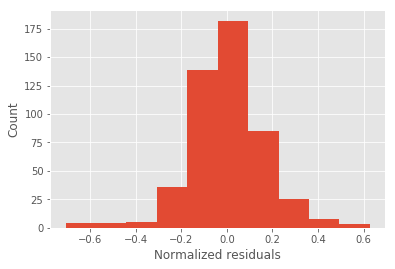

In [371]:
##Normality of residual
plt.hist(lm.resid)
plt.ylabel('Count')
plt.xlabel('Normalized residuals')

# Residual values

In [372]:
# model values
model_fitted_y = lm.fittedvalues
#print(model_fitted_y)
# model residuals
model_residuals = lm.resid
# normalized residuals
model_norm_residuals = lm.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = lm.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = lm.get_influence().cooks_distance[0]

# Residual vs fitted graph

Validate for linearity

If close to horizontal linear its linear

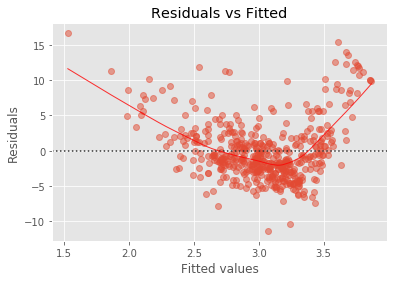

In [373]:
##Check for linearity (Crplot)
plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(model_fitted_y, df.columns[-1], data=df,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');

# QQ Plot

Validate for Normality of residual

If linear its normal

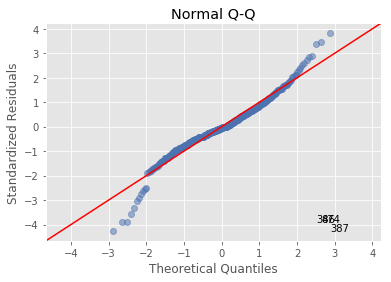

In [374]:
##Normality of residual (QQplot)
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');
# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]
for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i,
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));

# Homoscadsticity plot

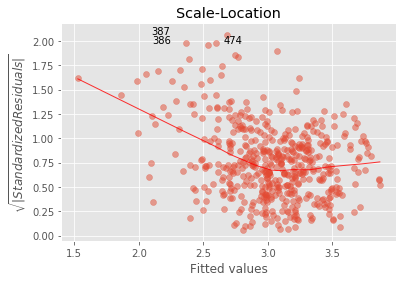

In [375]:
##Check for homoscadticity
plot_lm_3 = plt.figure()
plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5);
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt,
              scatter=False,
              ci=False,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

  # annotations
abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
for i in abs_norm_resid_top_3:
      plot_lm_3.axes[0].annotate(i,xy=(model_fitted_y[i],model_norm_residuals_abs_sqrt[i]))

# Residual vs Leverage plot

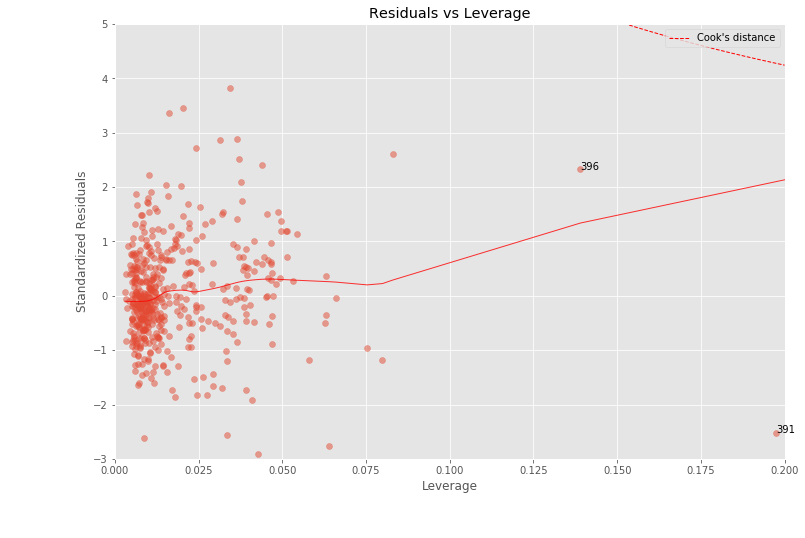

In [376]:
##Influence points by cooks distance
plot_lm_4 = plt.figure(4)
plot_lm_4.set_figheight(8)
plot_lm_4.set_figwidth(12)

plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
sns.regplot(model_leverage, model_norm_residuals, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_4.axes[0].set_xlim(0, 0.20)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals')

# annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]

for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i, 
                               xy=(model_leverage[i], 
                                   model_norm_residuals[i]))
    
# shenanigans for cook's distance contours
def graph(formula, x_range, label=None):
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')

p = len(lm.params) # number of model parameters

graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50), 
      'Cook\'s distance') # 0.5 line
graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50)) # 1 line
plt.legend(loc='upper right');